In [17]:
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
from sklearn.model_selection import train_test_split
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
pd.options.mode.chained_assignment = None 

In [18]:
df=pd.read_csv('Datasets2_Cleanned.csv')

In [19]:
df.head()

,Date,Sunspots
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0


In [30]:
df['indexDate'] = range(1, len(df) + 1)

In [29]:
len(df)

2814

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2814 entries, 0 to 2813
Data columns (total 3 columns):
Date         2814 non-null object
Sunspots     2814 non-null float64
indexDate    2814 non-null int32
dtypes: float64(1), int32(1), object(1)
memory usage: 55.1+ KB


In [32]:
X=df[['indexDate']]
y=df[['Sunspots']]

In [33]:
 #Break off validation set from training data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [34]:
X_train.shape

(2251, 1)

In [35]:
def get_mae(n_estimators, X_train, X_test, y_train, y_test):
    model = XGBRegressor(objective='reg:squarederror',n_estimators= n_estimators)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_test)
    mae = mean_squared_error(y_test, preds_val)
    return(mae)

In [36]:
# compare MAE with differing values of max_leaf_nodes
for n_estimators in [35,45,65,70, 50,55, 500, 5000]:
    my_mae = get_mae(n_estimators, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %.2f" %(n_estimators, my_mae))

Max leaf nodes: 35  		 Mean Absolute Error:  238.10
Max leaf nodes: 45  		 Mean Absolute Error:  229.98
Max leaf nodes: 65  		 Mean Absolute Error:  227.90
Max leaf nodes: 70  		 Mean Absolute Error:  228.09
Max leaf nodes: 50  		 Mean Absolute Error:  229.09
Max leaf nodes: 55  		 Mean Absolute Error:  228.69
Max leaf nodes: 500  		 Mean Absolute Error:  258.15
Max leaf nodes: 5000  		 Mean Absolute Error:  291.05


In [37]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=70)
model=model.fit(X_train, y_train)  
predict = model.predict(X_test)
# Calculate MAE
rmse=sqrt(mean_squared_error(X_test, predict))# Uncomment to print MAE
print("Mean Squered Error:" , rmse)

Mean Squered Error: 1568.6898066484669


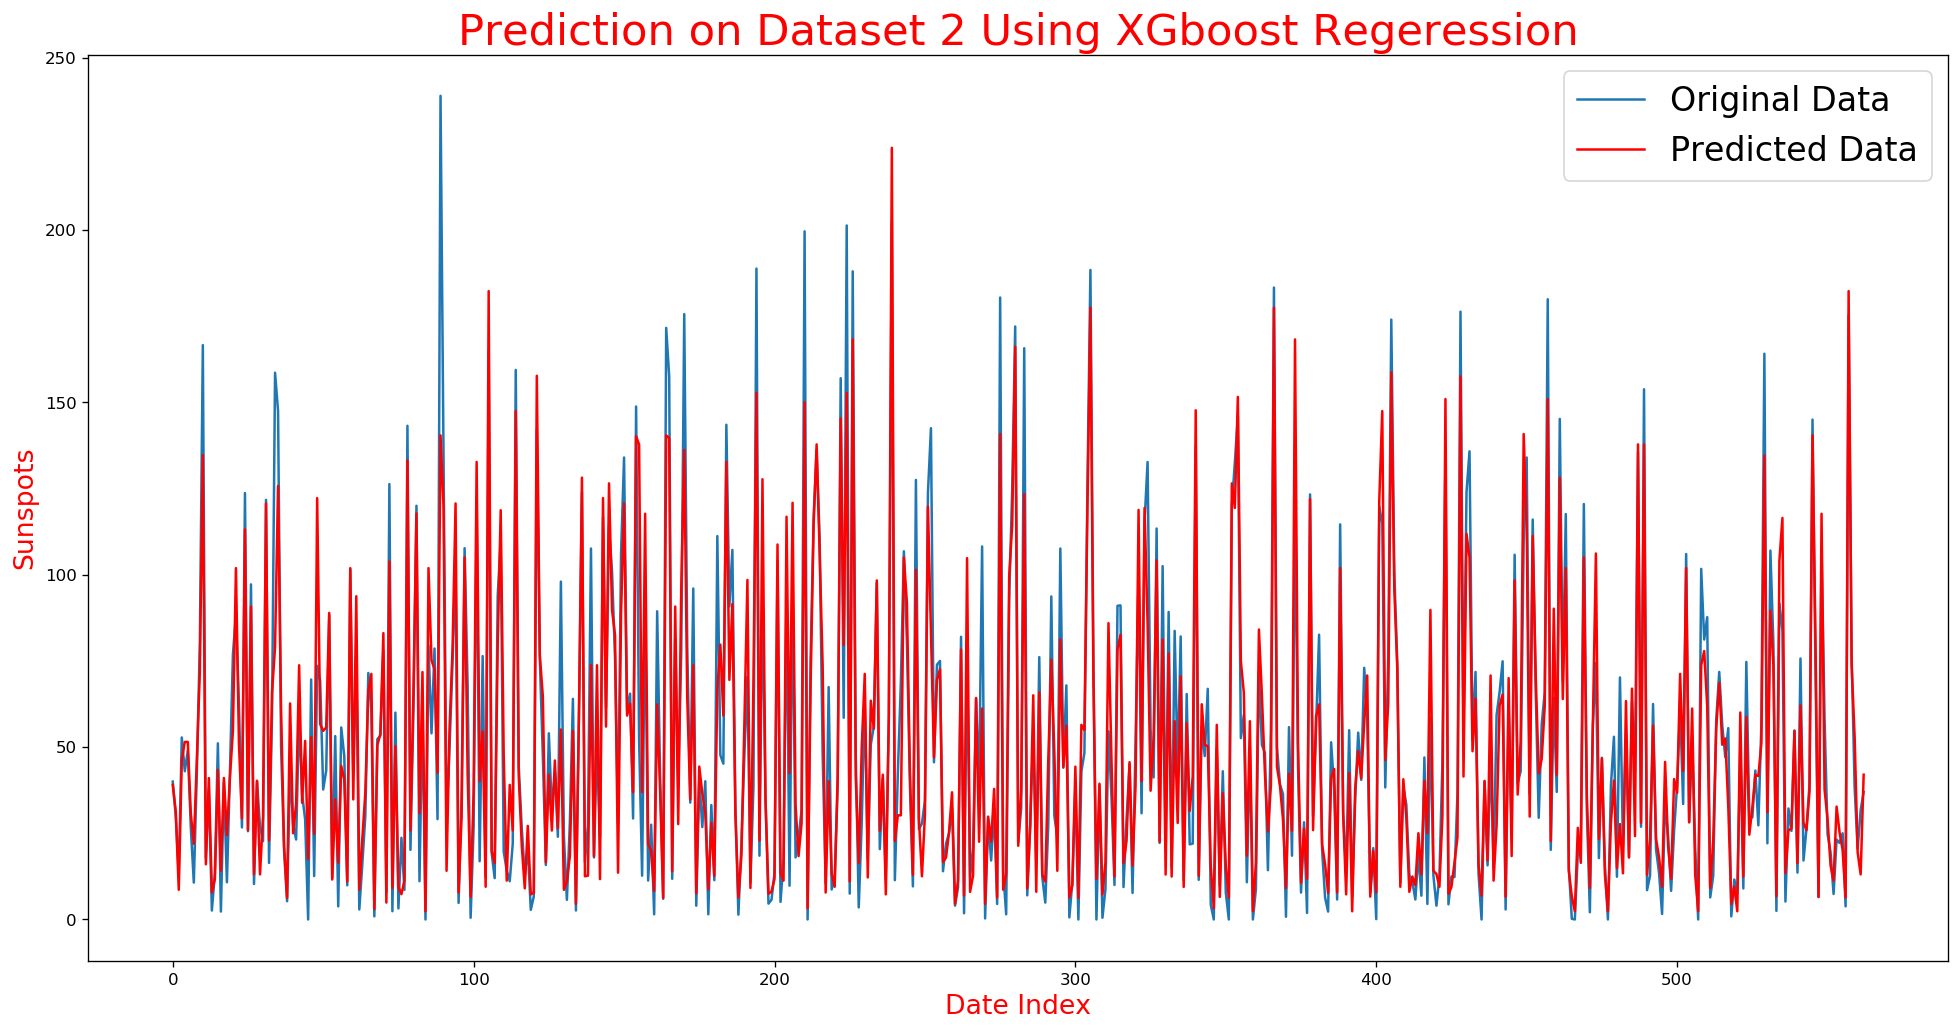

In [45]:
plt.figure(figsize=(20,10))
plt.plot(y_test.values, label='Original Data')
plt.plot(predict, color='red', label='Predicted Data')
plt.title('Prediction on Dataset 2 Using XGboost Regeression',color='red',fontsize=26)
plt.xlabel('Date Index',color='red',fontsize=16)     
plt.ylabel('Sunspots',color='red',fontsize=16)            
plt.legend(prop={'size': 20})
plt.show()         